<a href="https://colab.research.google.com/github/takahiromitsui/oi-ai-hackathon-berlin-july2024/blob/main/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

iMouse is a digital tool to automate mouse cage observation.

As a part of iMouse hackathon, we aimed to create a new model to identify each mouse individual in a home cage.

To simplify the model, our model expect that mice are marked by plain (no mark), striped or dotted.

Our team trained a model with plain, striped and dotted mice and predicts which mouse in a given image.

# Approach

Since we didn't have mouse input images, we collected BALC/c images on google as plain images.

Then, we marked copied images with either stripe or dotted.

In the end, we provided 30 images (10 each x 3 kinds(plain, striped, and dotted)) to train a model.

Our team flagged images by [label-studio](https://labelstud.io) and generated XML files and jpgs.

Then, we trained a model utilising [detecto](https://detecto.readthedocs.io/en/latest).

# step1 : Import image





In [ ]:
from google.colab import drive
drive.mount('/content/drive',  force_remount=True)

Mounted at /content/drive


In [ ]:
! ls

drive  sample_data


In [ ]:
%cd drive/MyDrive/animal_indentification/

/content/drive/MyDrive/animal_indentification


In [ ]:
! ls

dotted	images	plain  striped


# step 2



In [ ]:
# install detecto
!pip3 install detecto

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
from detecto import core, utils, visualize
dataset = core.Dataset('images')
model = core.Model(['plain', 'striped', 'dotted'])

In [ ]:
model.fit(dataset)

Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:12<00:00,  3.99it/s]


Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:12<00:00,  3.94it/s]


Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:13<00:00,  3.89it/s]


Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:13<00:00,  3.85it/s]


Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:13<00:00,  3.81it/s]


Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:13<00:00,  3.78it/s]


Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:13<00:00,  3.75it/s]


Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:13<00:00,  3.74it/s]


Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:13<00:00,  3.73it/s]


Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:13<00:00,  3.73it/s]


In [ ]:
image = utils.read_image('plain/images/df10cb9f-plain10.jpg')
predictions = model.predict(image)

In [ ]:
labels, boxes, scores = predictions

In [ ]:
print(labels)
print(boxes)
print(scores)

['plain', 'striped', 'dotted', 'plain', 'plain', 'plain', 'plain', 'dotted', 'striped', 'dotted', 'dotted', 'dotted', 'striped', 'striped', 'striped', 'plain']
tensor([[1.6292e+01, 1.5172e+01, 3.1503e+02, 3.2511e+02],
        [2.4171e+01, 4.4764e+01, 3.0698e+02, 2.1223e+02],
        [3.3797e+01, 5.8953e+01, 2.9707e+02, 2.2609e+02],
        [3.2997e+02, 9.3201e-03, 3.3000e+02, 2.3631e+00],
        [3.2998e+02, 3.4478e+01, 3.3000e+02, 5.7555e+01],
        [3.2995e+02, 3.2631e+01, 3.3000e+02, 5.6018e+01],
        [0.0000e+00, 1.7643e+02, 3.3000e+02, 3.2602e+02],
        [8.3130e+00, 0.0000e+00, 3.3000e+02, 2.8521e+02],
        [0.0000e+00, 1.0143e+02, 2.9098e+02, 2.8402e+02],
        [3.2997e+02, 0.0000e+00, 3.3000e+02, 2.3477e+00],
        [3.2998e+02, 3.4280e+01, 3.3000e+02, 5.7403e+01],
        [3.2995e+02, 3.2430e+01, 3.3000e+02, 5.5864e+01],
        [3.2997e+02, 0.0000e+00, 3.3000e+02, 2.3607e+00],
        [3.2998e+02, 3.4252e+01, 3.3000e+02, 5.7531e+01],
        [3.2995e+02, 3.2402e

In [ ]:
model.save('mode_weights.pth')

Visualize

In [2]:
!pip3 install detecto

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [3]:
from google.colab import drive
drive.mount('/content/drive',  force_remount=True)

Mounted at /content/drive


In [4]:
%cd drive/MyDrive/animal_indentification/

/content/drive/MyDrive/animal_indentification


In [5]:
from detecto import core, utils, visualize
image = utils.read_image('plain/images/df10cb9f-plain10.jpg')

tensor([0.2497, 0.6102, 0.3165])


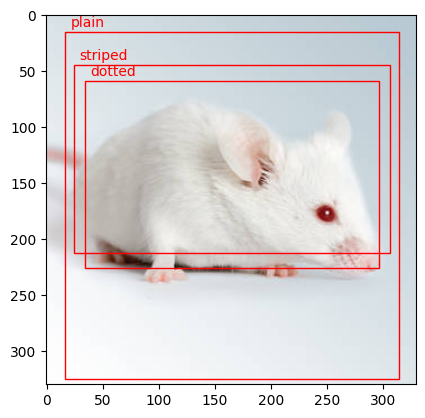

In [8]:
model = core.Model.load('mode_weights.pth', ['plain', 'striped', 'dotted'])
labels, boxes, scores = model.predict_top(image)
print(scores)
visualize.show_labeled_image(image, boxes, labels)

tensor([0.3348, 0.4901, 0.4701])


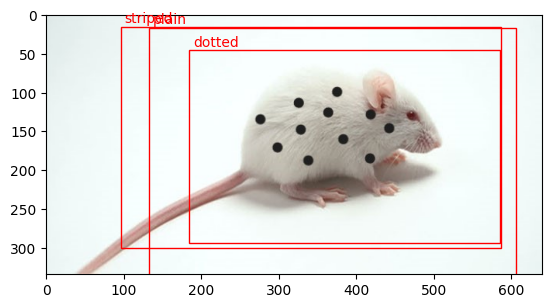

In [11]:
dotted_image = utils.read_image('dotted/images/02d511c1-dotted7.jpg')
labels, boxes, scores = model.predict_top(dotted_image)
print(scores)
visualize.show_labeled_image(dotted_image, boxes, labels)

tensor([0.1902, 0.4128, 0.6072])


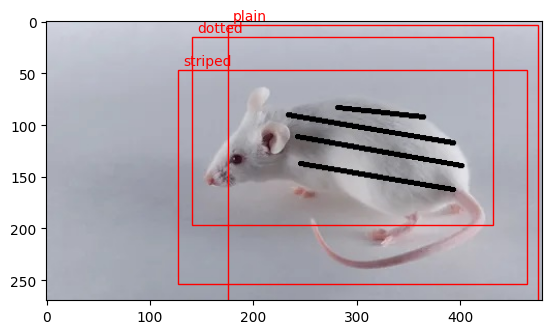

In [13]:
striped_image = utils.read_image('striped/images/b7bdd05c-striped9.jpg')
labels, boxes, scores = model.predict_top(striped_image)
print(scores)
visualize.show_labeled_image(striped_image, boxes, labels)

# Prediction

In [ ]:
image = utils.read_image('plain/images/df10cb9f-plain10.jpg')

array([[[217, 226, 231],
        [217, 226, 231],
        [217, 226, 231],
        ...,
        [184, 201, 211],
        [184, 201, 211],
        [184, 201, 211]],

       [[217, 226, 231],
        [217, 226, 231],
        [217, 226, 231],
        ...,
        [184, 201, 211],
        [184, 201, 211],
        [184, 201, 211]],

       [[217, 226, 231],
        [217, 226, 231],
        [217, 226, 231],
        ...,
        [184, 201, 211],
        [184, 201, 211],
        [184, 201, 211]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [222, 230, 233],
        [221, 229, 232],
        [221, 229, 232]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [222, 230, 233],
        [222, 230, 233],
        [222, 230, 233]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [222, 230, 233],
        [222, 230, 233],
        [222, 230, 233]]], dtype=uint8)
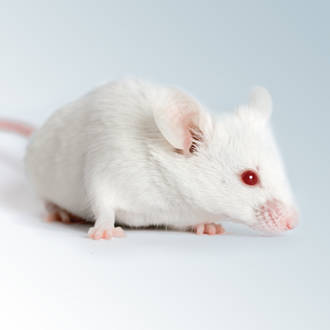

In [ ]:
image = core.Model.load('model_weights.pth', ['plain', 'striped', 'dotted'])

In [ ]:
model.predict(image)
model.save('model_weights.pth')

In [ ]:
model = core.Model.load('model_weights.pth', ['plain', 'striped', 'dotted'])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model.predict(image)

([], tensor([], size=(0, 4)), tensor([]))

In [ ]:
model = core.Model(['plain', 'striped', 'dotted'])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AttributeError: 'Model' object has no attribute 'predcit'